In [1]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip


--2020-10-27 12:53:36--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip
Resolviendo md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.60.216
Conectando con md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)[52.218.60.216]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 198985388 (190M) [application/octet-stream]
Guardando como: “dataroot/fvk7h5dg2p-1.zip”

fvk7h5dg2p-1.zip    100%[===================>] 189,77M  6,87MB/s    en 47s     

2020-10-27 12:54:24 (4,04 MB/s) - “dataroot/fvk7h5dg2p-1.zip” guardado [198985388/198985388]



In [2]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"fvk7h5dg2p-1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

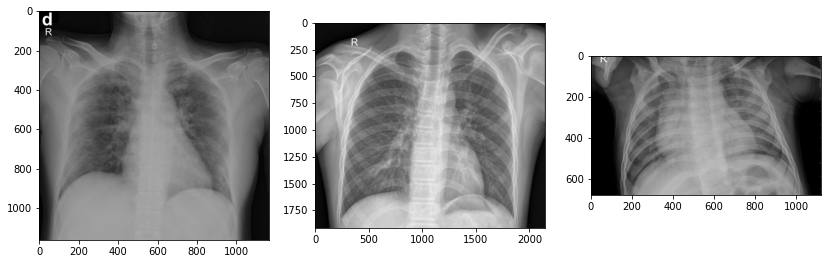

In [3]:
# Load and preview images
import matplotlib.pyplot as plt
import numpy as np
import cv2

dataroot = "dataset/"
img_covid     = cv2.imread(dataroot+'COVID-19 cases/1-s2.0-S0929664620300449-gr2_lrg-d.jpg',0)
img_normal    = cv2.imread(dataroot+'Normal/IM-0011-0001-0001.jpeg',0)
img_pneumonia = cv2.imread(dataroot+'Pneumonia/person1650_virus_2854.jpeg',0)

i = 1
plt.figure(figsize=(14,14))
plt.subplot(i,3,1)
plt.imshow(img_covid,cmap='gray')
plt.subplot(i,3,2)
plt.imshow(img_normal,cmap='gray')
plt.subplot(i,3,3)
plt.imshow(img_pneumonia,cmap='gray')

**Extraigo las caracteristicas que me da pyradiomics de cada una de las clases (Normal, pNeumonia, covid19) y veo que hay - borré de la carpeta covid las que estaban de costado...**

In [4]:
import SimpleITK as sitk
from radiomics import featureextractor
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import metrics

In [5]:
lista_de_archivos_covid = os.listdir("dataset/COVID-19 cases")


# Instantiate extractor with parameter file
extractor = featureextractor.RadiomicsFeatureExtractor()
#extractor.disableAllFeatures()
#extractor.enableFeatureClassByName('shape2D')

label = 1  # Change this if the ROI in your mask is identified by a different value


#Featurs covid
result_covid = {}

i=0
for archivo in lista_de_archivos_covid:
    img     = cv2.imread( "./dataset/COVID-19 cases/" + archivo ,0)
    
    #Creo la mascara para radiomics
    img_mask = np.ones(img.shape, np.uint8)
    
    if( img.shape[1]  > img.shape[0] ):
        radio = int(img.shape[1]/2)
    else:
        radio = int(img.shape[0]/2)
    
    img_mask = cv2.circle(img_mask,(int(img.shape[1]/2), int(img.shape[0]/2)), radio, (0,0,0), -1)


    # Load the image and extract a color channe
    imggraysitk=sitk.GetImageFromArray(img)
    maskgraysitk=sitk.GetImageFromArray(img_mask)
    result_covid[i] = extractor.execute(imggraysitk, maskgraysitk, label)
    i = i + 1

feature_names = list(sorted(filter ( lambda k: k.startswith("original_"), result_covid[0] )))

samples_covid = np.zeros((len(lista_de_archivos_covid),len(feature_names)))
for i in range(0, len(lista_de_archivos_covid)):
    #print(case_id)
    a = np.array([])
    for feature_name in feature_names:
        a = np.append(a, result_covid[i][feature_name])
    samples_covid[i,:] = a
    
# May have NaNs
samples_covid = np.nan_to_num(samples_covid)

#Para tener
#plt.imshow(img_mask)
#plt.show()
#plt.imshow(img_covid)
#plt.show()
#print(img_covid.shape)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

In [6]:
#Featurns Normal
lista_de_archivos_normal = os.listdir("dataset/Normal")
result_normal = {}

i=0
for archivo in lista_de_archivos_normal:
    img     = cv2.imread( "./dataset/Normal/" + archivo ,0)
    
    #Creo la mascara para radiomics
    img_mask = np.ones(img.shape, np.uint8)
    
    if( img.shape[1]  > img.shape[0] ):
        radio = int(img.shape[1]/2)
    else:
        radio = int(img.shape[0]/2)
    
    img_mask = cv2.circle(img_mask,(int(img.shape[1]/2), int(img.shape[0]/2)), radio, (0,0,0), -1)


    # Load the image and extract a color channe
    imggraysitk=sitk.GetImageFromArray(img)
    maskgraysitk=sitk.GetImageFromArray(img_mask)
    
    result_normal[i] = extractor.execute(imggraysitk, maskgraysitk, label)
    i = i + 1
    

feature_names = list(sorted(filter ( lambda k: k.startswith("original_"), result_normal[0] )))

samples_normal = np.zeros((len(lista_de_archivos_normal),len(feature_names)))
for i in range(0, len(lista_de_archivos_covid)):
    #print(case_id)
    a = np.array([])
    for feature_name in feature_names:
        a = np.append(a, result_normal[i][feature_name])
    samples_normal[i,:] = a
    
# May have NaNs
samples_normal = np.nan_to_num(samples_normal)



Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

In [7]:
#features pneumonia
lista_de_archivos_pneu = os.listdir("dataset/Pneumonia")
result_pneu = {}

i=0
for archivo in lista_de_archivos_pneu:
    img     = cv2.imread( "./dataset/Pneumonia/" + archivo ,0)
    
    #Creo la mascara para radiomics
    img_mask = np.ones(img.shape, np.uint8)
    
    if( img.shape[1]  > img.shape[0] ):
        radio = int(img.shape[1]/2)
    else:
        radio = int(img.shape[0]/2)
    
    img_mask = cv2.circle(img_mask,(int(img.shape[1]/2), int(img.shape[0]/2)), radio, (0,0,0), -1)


    # Load the image and extract a color channe
    imggraysitk=sitk.GetImageFromArray(img)
    maskgraysitk=sitk.GetImageFromArray(img_mask)
    
    result_pneu[i] = extractor.execute(imggraysitk, maskgraysitk, label)
    i = i + 1
    

feature_names = list(sorted(filter ( lambda k: k.startswith("original_"), result_pneu[0] )))

samples_pneu = np.zeros((len(lista_de_archivos_pneu),len(feature_names)))
for i in range(0, len(lista_de_archivos_pneu)):
    #print(case_id)
    a = np.array([])
    for feature_name in feature_names:
        a = np.append(a, result_pneu[i][feature_name])
    samples_pneu[i,:] = a
    
# May have NaNs
samples_pneu = np.nan_to_num(samples_pneu)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is 

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
S

In [116]:
#Junto toda la data
print(samples_covid.shape)
print(samples_normal.shape)
print(samples_pneu.shape)



samples_covid_t = np.hstack([samples_covid, np.ones([samples_covid.shape[0],1])])
samples_normal_t = np.hstack([samples_normal, np.ones([samples_normal.shape[0],1]) + 1])
samples_pneu_t = np.hstack([samples_pneu, np.ones([samples_pneu.shape[0],1]) + 2])

print(samples_covid_t.shape)
print(samples_normal_t.shape)
print(samples_pneu_t.shape)

(201, 93)
(234, 93)
(148, 93)
(201, 94)
(234, 94)
(148, 94)


In [117]:
samples = np.vstack([samples_covid_t, samples_normal_t])
samples = np.vstack([samples, samples_pneu_t ])


print(samples.shape)

(583, 94)


In [118]:
arch_covid = np.array(lista_de_archivos_covid).reshape((samples_covid.shape[0],1))
arch_normal = np.array(lista_de_archivos_normal).reshape((samples_normal.shape[0],1))
arch_pneu = np.array(lista_de_archivos_pneu).reshape((samples_pneu.shape[0],1))
archivos = np.vstack([arch_covid, arch_normal])
archivos = np.vstack([archivos, arch_pneu ])

print(archivos.shape)

(583, 1)


**Separo train y test**

In [25]:
import numpy as np
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pp

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [120]:
dataset = samples.copy()
idx = np.random.permutation( dataset.shape[0] )
#np.random.shuffle(dataset)
dataset = dataset[idx]
archivos = archivos[idx]
X=dataset[:,:-1]
y=dataset[:,-1]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
arch_train, arch_test = train_test_split(archivos, test_size=0.2, random_state=1) 

In [122]:
#Voy a usar RandomForest para quedarme con algunas features! 93 es una locuraaa!!!
param_distributions = {
                        "max_leaf_nodes": (10, 12, 14, 16, 18, 20),
                        "n_estimators": (200, 300, 400, 500)
                      }

grid_rf_cv = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_distributions, cv=4, scoring='accuracy')
grid_rf_cv.fit(X_train, y_train)

mejor_clf_rf = grid_rf_cv.best_estimator_
print(mejor_clf_rf)

RandomForestClassifier(max_leaf_nodes=20, n_estimators=500, n_jobs=-1)


In [123]:
print("\n\nComponentes más importantes para distinguir ambos casos:\n")
scores = np.zeros(len(feature_names))
i = 0
for name, score in zip(feature_names, mejor_clf_rf.feature_importances_):
    scores[i] = score
    i = i + 1



Componentes más importantes para distinguir ambos casos:



In [124]:
inds = scores.argsort()
feature_names2 = [feature_names[i] for i in inds]

In [125]:
scores2 = [scores[i] for i in inds]

for i in range (len(scores2)):
    print(feature_names2[i], scores2[i])

original_firstorder_InterquartileRange 0.001391601474894119
original_firstorder_Uniformity 0.0016552433724011959
original_glcm_Idn 0.0017138720473600458
original_gldm_GrayLevelVariance 0.001908793791156697
original_firstorder_Variance 0.001983568901324564
original_glcm_Idm 0.0020098231715520816
original_glcm_Id 0.0020455061506946762
original_gldm_LargeDependenceEmphasis 0.0020787288558837013
original_glcm_ClusterTendency 0.0020898461934523416
original_glcm_JointEnergy 0.002152428526867535
original_firstorder_RobustMeanAbsoluteDeviation 0.002164014030491399
original_firstorder_Minimum 0.002307763242475662
original_firstorder_MeanAbsoluteDeviation 0.00253080297290275
original_glcm_SumSquares 0.0025352089725687384
original_glrlm_RunVariance 0.0026390077983369674
original_glcm_Imc2 0.0026546956432999336
original_ngtdm_Contrast 0.0026567869522751645
original_glrlm_HighGrayLevelRunEmphasis 0.002676546426757125
original_gldm_DependenceEntropy 0.0027144573934328536
original_glcm_MaximumProbabi

**Ahora si me quedo con los 12 que tienen más incidencia**

In [126]:
cols_importantes_target = ['original_glszm_GrayLevelVariance', 'original_firstorder_Mean', 
                           'original_firstorder_Median',
                   'original_glcm_Contrast', 'original_glcm_SumAverage', 'original_glszm_SmallAreaEmphasis',
                   'original_glcm_JointAverage', 'original_glcm_DifferenceVariance',
                   'original_glszm_LowGrayLevelZoneEmphasis', 'original_glszm_SizeZoneNonUniformityNormalized',
                   'original_firstorder_RootMeanSquared', 'original_gldm_LargeDependenceHighGrayLevelEmphasis', 'target']

j = 0
for i in range(len(feature_names2) - 1, len(feature_names2) - 13, -1):
    cols_importantes_target[j] = feature_names2[i]
    j = j + 1

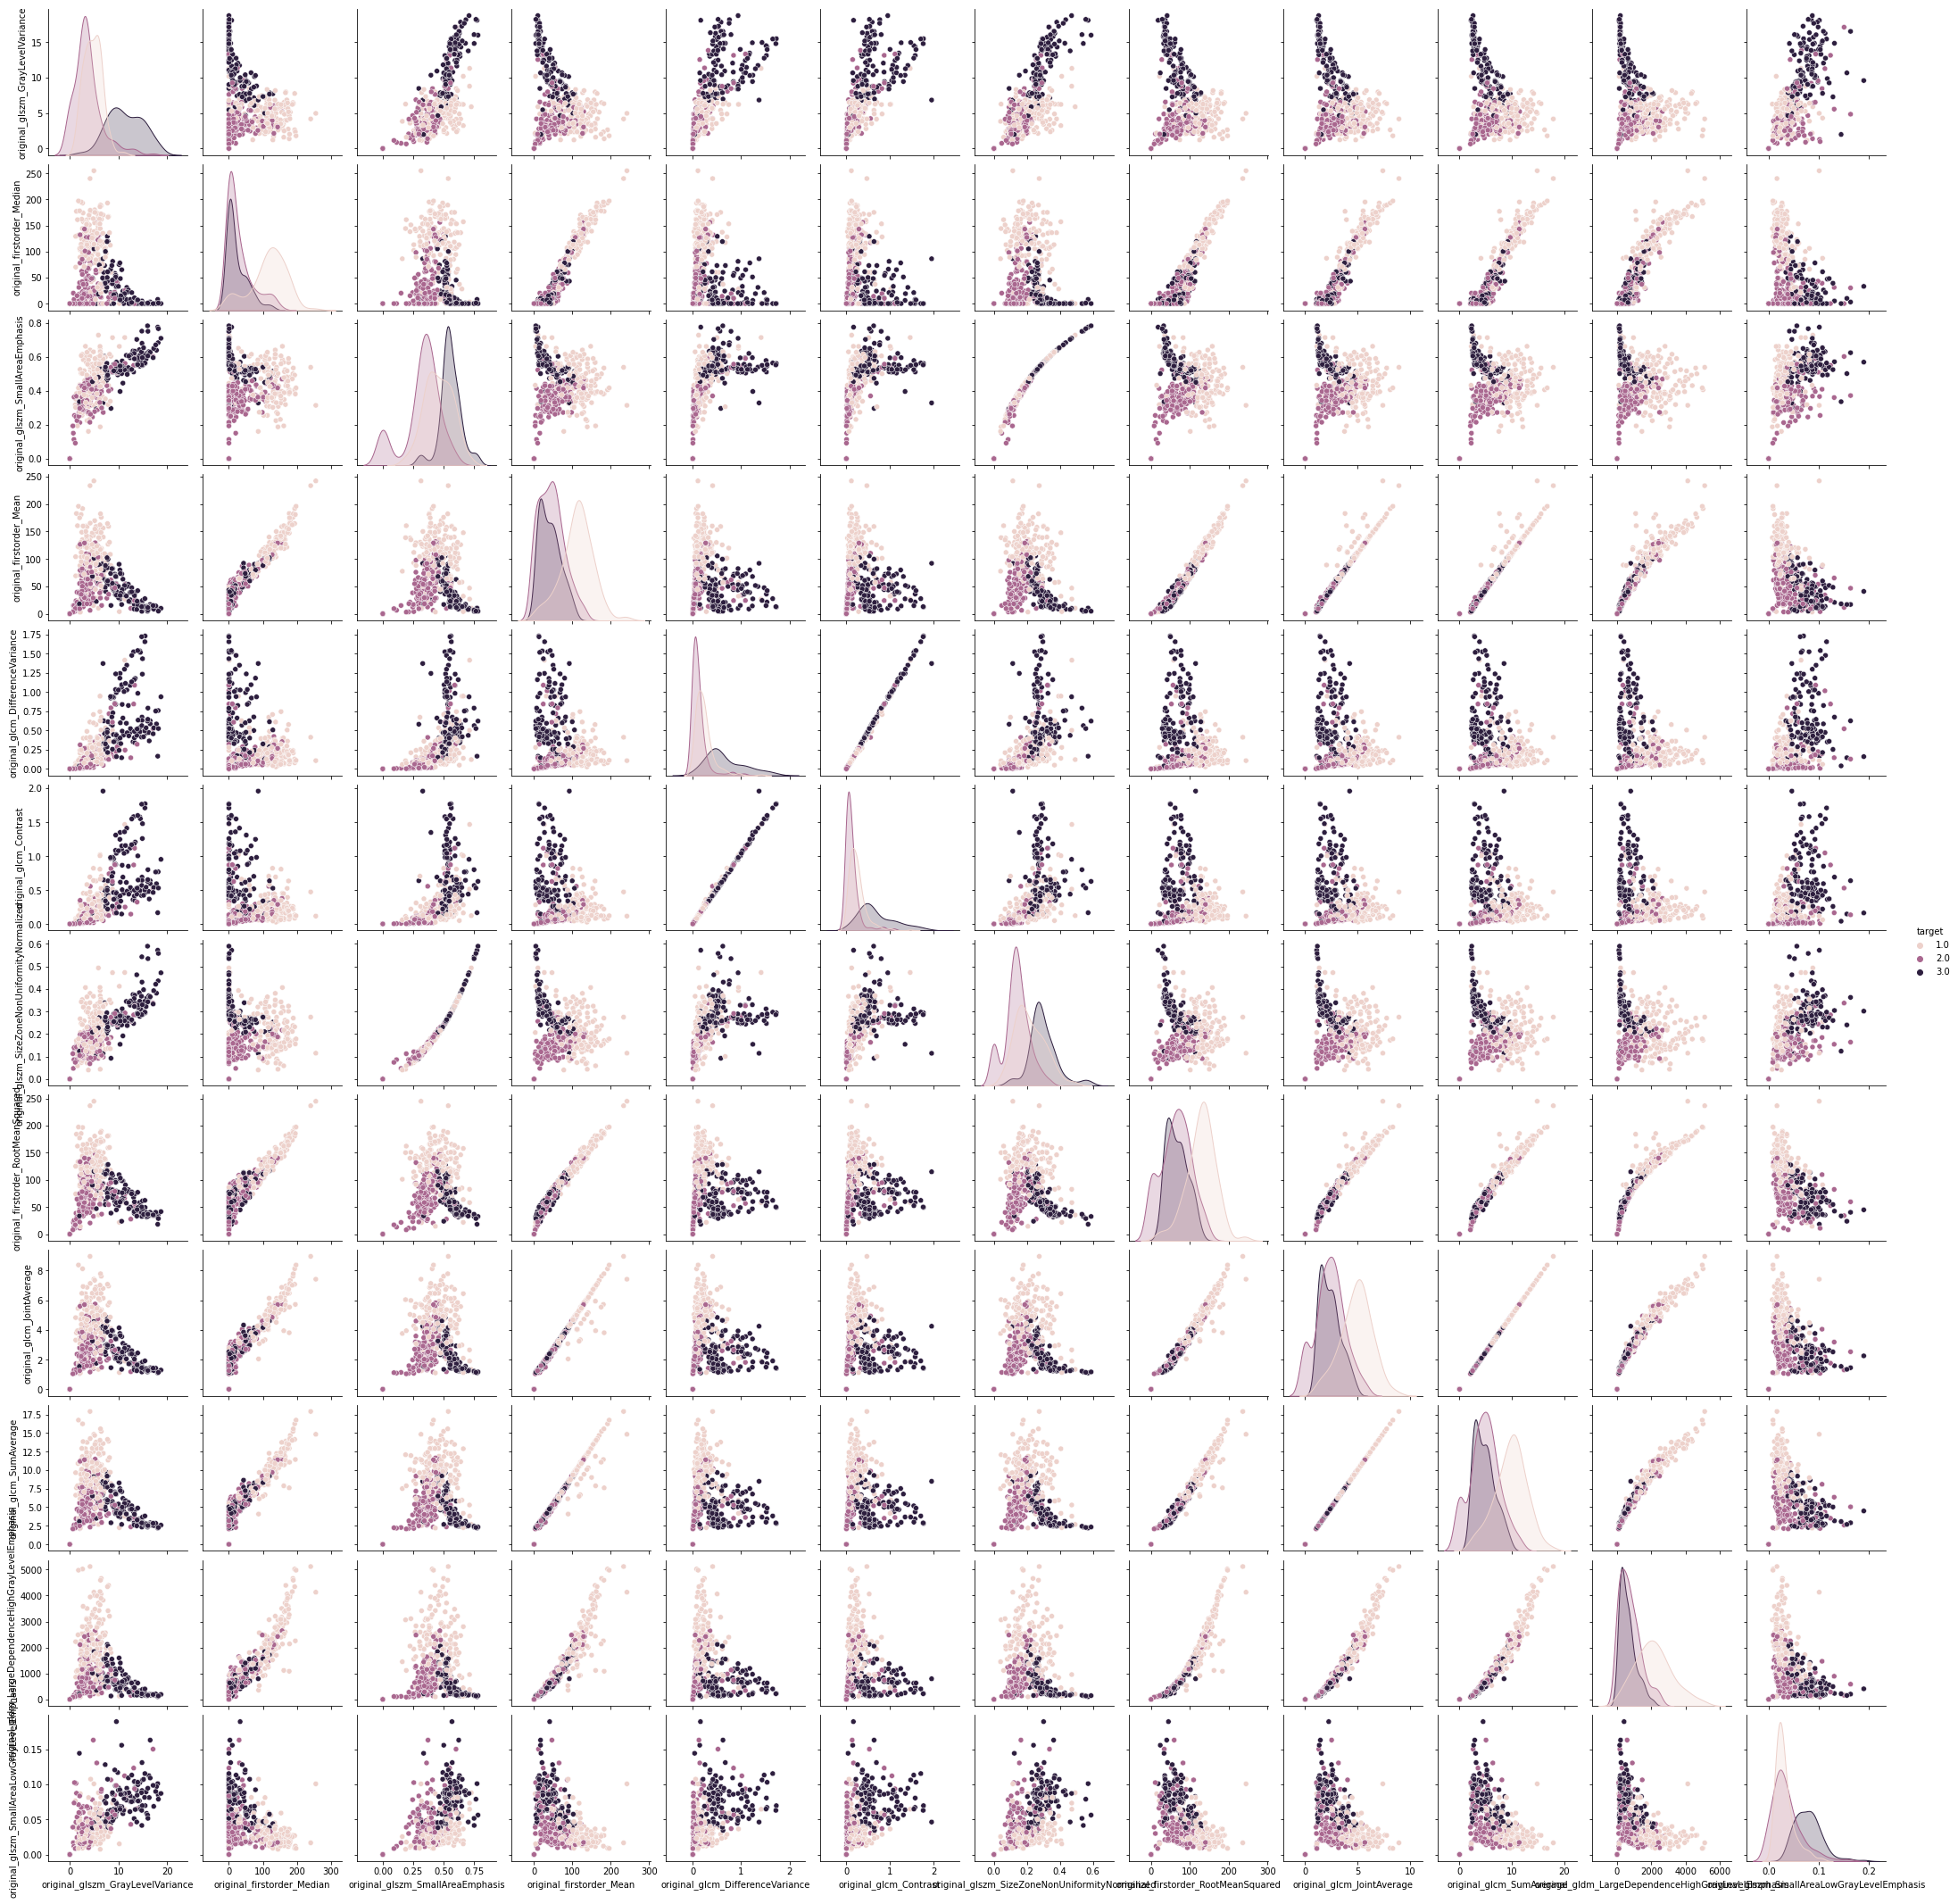

In [127]:
import pandas as pd
import seaborn as sns

pd_train = pd.DataFrame(data=X_train, columns=feature_names)
pd_train["target"] = y_train
sns.pairplot(pd_train[cols_importantes_target], hue='target')

**Se ve que distintas features segmentan las distintas clases... vamos a ver como da la clasificación**

In [128]:

cols_importantes = cols_importantes_target[:-1]
X_train_reduced = pd_train[cols_importantes]

In [129]:
#Random Forest
param_distributions = {
                        "max_leaf_nodes": (10, 12, 14, 16, 18, 20),
                        "n_estimators": (200, 300, 400, 500)
                      }


grid_rf_cv = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_distributions, cv=4, scoring='accuracy')
grid_rf_cv.fit(X_train_reduced, y_train)

mejor_clf_rf = grid_rf_cv.best_estimator_
print(mejor_clf_rf)

RandomForestClassifier(max_leaf_nodes=20, n_estimators=200, n_jobs=-1)


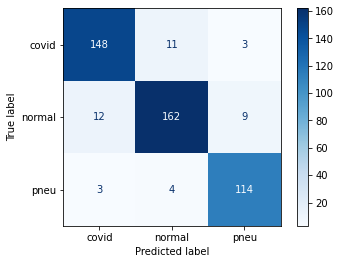

Metricas obtenidas: 
Exactitud = 0.91
Precision = 0.93
f-measure = 0.93


In [130]:
y_pred = mejor_clf_rf.predict(X_train_reduced)

class_names = ['covid', 'normal', 'pneu']
disp = plot_confusion_matrix(mejor_clf_rf, X_train_reduced, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize=None, display_labels=class_names)

plt.show()



cm = confusion_matrix( y_train, y_pred)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_train, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

In [131]:
#A ver con test

pd_test = pd.DataFrame(data=X_test, columns=feature_names)
X_test_reduced = pd_test[cols_importantes]

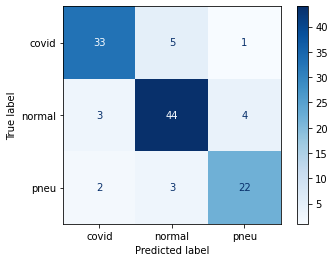

Metricas obtenidas: 
Exactitud = 0.85
Precision = 0.87
f-measure = 0.89


In [132]:
y_pred_rf = mejor_clf_rf.predict(X_test_reduced)

class_names = ['covid', 'normal', 'pneu']
disp = plot_confusion_matrix(mejor_clf_rf, X_test_reduced, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None, display_labels=class_names)

plt.show()



cm = confusion_matrix( y_test, y_pred_rf)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_test, y_pred_rf)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

**Voy a probar con SVM**

In [133]:
svm_clf = Pipeline([
        ("scaler", pp.StandardScaler()),
        ("svm_clf", svm.SVC(random_state=42, probability=True))
    ])


param_distributions = {
                       "svm_clf__kernel": ['poly', 'rbf'],
                       'svm_clf__degree': np.linspace(2, 5),
                       "svm_clf__gamma": reciprocal(0.001, 0.1), 
                       "svm_clf__C": uniform(3, 6)
                      }
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, cv=4, scoring='accuracy', random_state=42)
rnd_search_cv.fit(X_train_reduced, y_train)
mejor_clf_svm = rnd_search_cv.best_estimator_
mejor_clf_svm

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=5.736419905302215, degree=4.816326530612245,
                     gamma=0.017249321573179, probability=True,
                     random_state=42))])

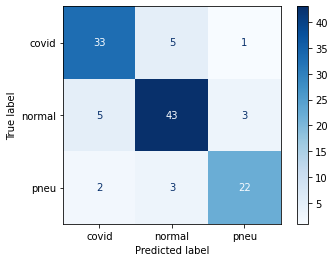

Metricas obtenidas: 
Exactitud = 0.84
Precision = 0.87
f-measure = 0.87


In [134]:
y_pred_svm = mejor_clf_svm.predict(X_test_reduced)

class_names = ['covid', 'normal', 'pneu']
disp = plot_confusion_matrix(mejor_clf_svm, X_test_reduced, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None, display_labels=class_names)

plt.show()



cm = confusion_matrix( y_test, y_pred_svm)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_test, y_pred_svm)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

In [139]:
print(y_pred_rf.shape)

(117,)


Los que se equivocó:


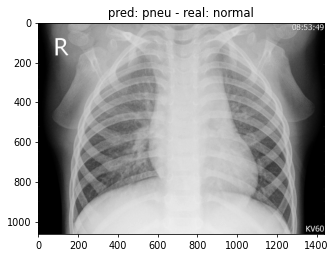

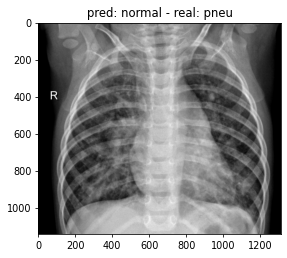

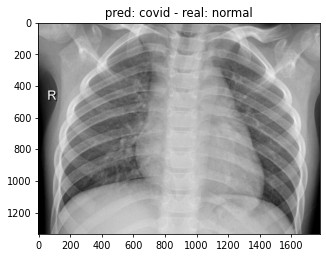

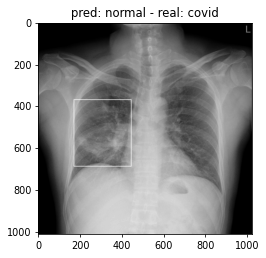

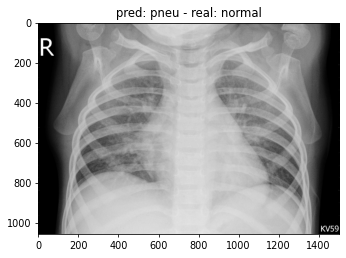

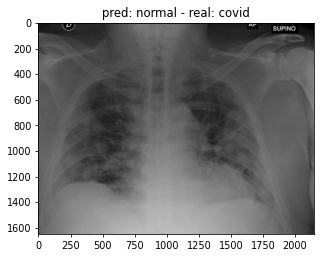

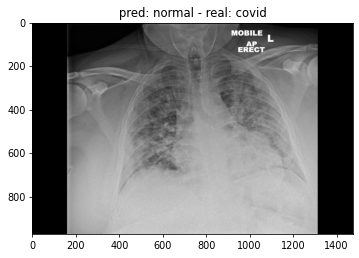

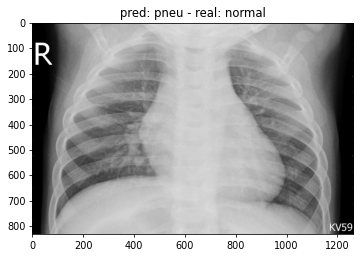

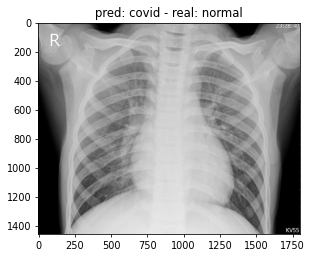

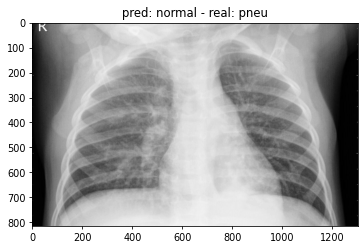

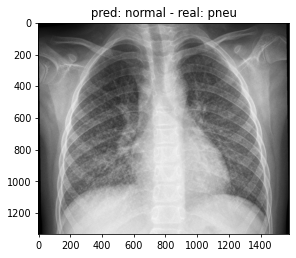

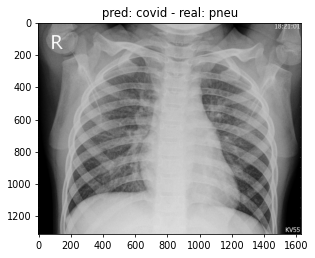

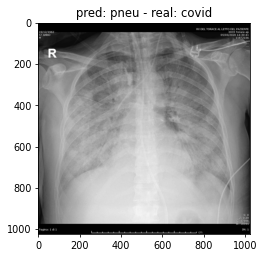

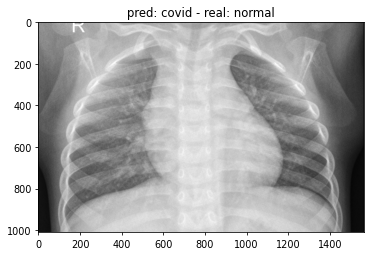

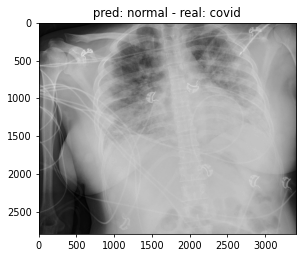

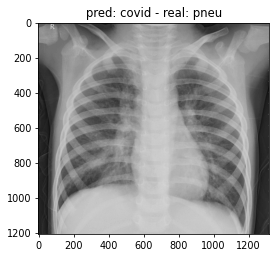

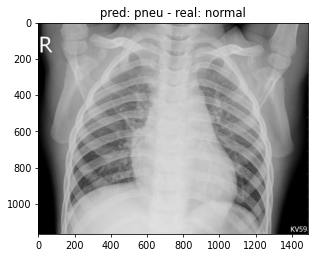

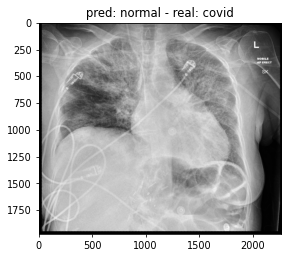

In [154]:
#Grafico en los que se equivocó
y_pred_err = y_pred_rf.reshape(117) != y_test.reshape(117)

print("Los que se equivocó:")

n = y_pred_err.shape[0]
#plt.figure(figsize=(20, 4))
j = 0
for i in range(n):
    if y_pred_err[i] == True:
        j = j + 1
        if( y_test[i] == 1 ): #covid
            archivo = "dataset/COVID-19 cases/" + arch_test[i][0]
        elif ( y_test[i] == 2 ): #Normal
            archivo = "dataset/Normal/" + arch_test[i][0]
        else:
            archivo = "dataset/Pneumonia/" + arch_test[i][0]
        
        img = cv2.imread( archivo ,0)
        
        plt.figure(dpi=70)
        plt.title( "pred: " + class_names[int(y_pred_rf[i] - 1)] + " - real: " + class_names[int(y_test[i] - 1)] )
        plt.imshow(img)
        plt.gray()
        plt.show()


**Me gustaría que un médico vea que pasa en las que se equivoca... Salvo en las que claramente la imagen está muy deteriada**